<img src="../logo/logo.jpg">

# Table of Contents
* [Operaciones con Series y Dataframes](#Operaciones-con-Series-y-Dataframes)
	* [Operaciones aritméticas y alineamiento de datos](#Operaciones-aritméticas-y-alineamiento-de-datos)
	* [Ordenación de  índices  y valores](#Ordenación-de--índices--y-valores)
	* [Tratamiento de valores NaN](#Tratamiento-de-valores-NaN)
	* [Operaciones estadísticas en pandas](#Operaciones-estadísticas-en-pandas)
		* [Relación entre variables: Correlación y covarianza](#Relación-entre-variables:-Correlación-y-covarianza)
			* [Matriz de correlación](#Matriz-de-correlación)
			* [Correlación entre dos columnas](#Correlación-entre-dos-columnas)
		* [Matriz de covarianza](#Matriz-de-covarianza)


# Operaciones con Series y Dataframes

In [1]:
import numpy as np
import pandas as pd

## Operaciones aritméticas y alineamiento de datos

Una de las características mas importante en torno a los índices de las estructuras de datos en Pandas es el alineamiento. Pandas es capaz de alinear dos estructuras (series o dataframes) en base a las etiquetas de sus índices. Esta propiedad es especialmente interesante cuando se realizan operaciones aritméticas, teniendo en cuenta que dichas operaciones pueden involucar estructuras con etiquetas comunes en sus índices, índices no ordenados, incluso puede darse el caso de tener etiquetas en solo uno de los índices. 

En esta sección mostramos algunos ejemplos de operaciones. En primer lugar cremos dos dataframes con distintas etiquetas para sus índices.

In [2]:
datos_1 = np.array([[ 1000, 3000],
       [ 5000, 1000],
       [ 4200, 6000],
       [ 5000, 5500]])
t1 = pd.DataFrame(datos_1, columns= ('Gastos', 'Ingresos'),
                  index = [2006, 2002, 2005, 2007])


In [3]:
t1

,Gastos,Ingresos
2006,1000,3000
2002,5000,1000
2005,4200,6000
2007,5000,5500


In [4]:
datos_2 = np.array([[ 1000, 5000],
       [ 5000, 5000],
       [ 2500, 3000],
       [ 2500, 1500]])
t2 = pd.DataFrame(datos_2, columns= ( 'Gastos', 'Ingresos'), 
                  index = [2002,2006, 2007, 2008])
t2

,Gastos,Ingresos
2002,1000,5000
2006,5000,5000
2007,2500,3000
2008,2500,1500


Como podemos observar, ambos dataframes tienen algunas etiquetas comunes en sus índices y otras que solo aparecen en uno de los dataframes. En el siguiente ejemplo, mostramos cómo se comporta la operación suma aplicando el operador (`+`).

In [5]:
t1 + t2

,Gastos,Ingresos
2002,6000.0,6000.0
2005,NaN,NaN
2006,6000.0,8000.0
2007,7500.0,8500.0
2008,NaN,NaN


Cuando una etiqueta aparece en el índice de ambos dataframes, se realiza la suma de los valores. En caso contrario se asigna el valor `NaN`. Este es el comportamiento para todos los operadores aritméticos. Sin embargo, como alternativa a ésta perdida de información, es posible utilizar los métodos `add`, `sub`, `div` y `mul`, que implementan la operación  suma, resta, división y multiplicación respectivamente. El argumento `fill_value` permite indicar el valor por defecto para aquellas etiquetas que no aparecen en el índice.

In [6]:
t1.add(t2, fill_value = 0 )

,Gastos,Ingresos
2002,6000.0,6000.0
2005,4200.0,6000.0
2006,6000.0,8000.0
2007,7500.0,8500.0
2008,2500.0,1500.0


El comportamiento es análogo en el caso de operar con diferentes estructuras de datos, por ejemplo, con un dataframe y una serie.

In [7]:
t1

,Gastos,Ingresos
2006,1000,3000
2002,5000,1000
2005,4200,6000
2007,5000,5500


## Ordenación de  índices  y valores

La ordenación de los datos por algún criterio es una operación muy habitual cuando se trata de analizar datos. El método `sort_index` de la clase `DataFrame` ordena lexicográficamente los índices de  un dataframes en base a cualquiera de sus índices.

In [8]:
t1

,Gastos,Ingresos
2006,1000,3000
2002,5000,1000
2005,4200,6000
2007,5000,5500


In [9]:
t1.sort_index()

,Gastos,Ingresos
2002,5000,1000
2005,4200,6000
2006,1000,3000
2007,5000,5500


Es posible indicar mediante el argumento `ascending` el tipo de ordenación ascendente o descendente.

In [10]:
t1.sort_index(ascending = False)

,Gastos,Ingresos
2007,5000,5500
2006,1000,3000
2005,4200,6000
2002,5000,1000


Para ordenar el índice asociado a las columnas utilizamos el argumento `axis` con valor 1.

In [11]:
t1.sort_index(axis = 1, ascending = False)

,Ingresos,Gastos
2006,3000,1000
2002,1000,5000
2005,6000,4200
2007,5500,5000


Para ordenar los valores de una serie o un dataframe usamos el método `sort_values`. En el caso de los dataframes, es necesario indicar las columnas (mediante una lista) por las que queremos ordenar en el argumento `by`. 

In [12]:
t1.sort_values(by = ['Gastos'])

,Gastos,Ingresos
2006,1000,3000
2005,4200,6000
2002,5000,1000
2007,5000,5500


Por defecto, la ordenación es ascendente en todas las columnas, pudiendo indicar otro orden mediante una lista de valores de tipo `bool` en el argumento `ascending`.

In [13]:
t1.sort_values(by = ['Gastos', 'Ingresos'] , ascending = [True, False])

,Gastos,Ingresos
2006,1000,3000
2005,4200,6000
2007,5000,5500
2002,5000,1000


Como resultado obtenemos un nuevo dataframe ordenado de forma ascendente en cuanto a la columna Gastos y descendente en cuanto a la columna Ingresos.

## Tratamiento de valores NaN

Resulta bastante habitual cuando se trabaja con datos, encontrarse con valores vacíos o desconocidos. Ya hemos comentado anteriormente que estos valores se identifican con `NaN`(Not a Number). Aunque Pandas es capaz de tratar este tipo de valores de forma implícita, resulta de mucha utilidad conocer las herramientas que proporciona Pandas para su manejo.

Por un lado, es posible asignar valores `NaN` de forma explícita usando el valor `np.nan` de la librería `NumPy`.

In [14]:
t3 = pd.DataFrame( data = [ (np.nan, 'ES', 46449, np.nan), 
                            ('Alemania', np.nan , np.nan, np.nan),
                            ('Japón', 'JP', np.nan, '2005') ],
                       columns =  ['País', 'Código', 'Pob.', 'Año'])
t3

,País,Código,Pob.,Año
0,NaN,ES,46449.0,NaN
1,Alemania,NaN,NaN,NaN
2,Japón,JP,NaN,2005


La operación `dropna` eliminará todas las filas y todas las columnas que tengan algún valor `NaN`.

In [15]:
t3.dropna()

,País,Código,Pob.,Año


Para eliminar aquellas filas en las que los valores de todas las columnas son `NaN`, usamos las opciones `axis` y `how` con valores `0` y  `all` respectivamente.

In [16]:
t3.dropna(how = 'all', axis = 0 )

,País,Código,Pob.,Año
0,NaN,ES,46449.0,NaN
1,Alemania,NaN,NaN,NaN
2,Japón,JP,NaN,2005


Y si queremos eliminar aquellas filas o columnas que no alcanzan un número determinado de valores distinto de `NaN`, usamos la opción __thresh__. Por ejemplo, para eliminar   aquellas filas que no tienen al menos 3 valores distintos de `Nan`, escribiremos:

In [17]:
t3.dropna( axis = 0,  thresh = 3 )

,País,Código,Pob.,Año
2,Japón,JP,NaN,2005


En los casos en los no deseamos eliminar datos con valores `NaN`, Pandas ofrece la posibilidad de sustituir dichos  valores por un valor por defecto. Para ello usamos el método `fillna` junto con el valor a sustituir.

In [18]:
t3.fillna(0)

,País,Código,Pob.,Año
0,0,ES,46449.0,0
1,Alemania,0,0.0,0
2,Japón,JP,0.0,2005


También es posible indicar un valor por defecto distinto para cada columna. En ese caso,  usaremos un diccionario como argumento del método `fillna`. Las claves del diccionario serán las etiquetas del índice de las columnas afectadas y el valor asociado a cada una de las claves, será el valor por defecto que sustituye a `NaN`.

In [19]:
d = {'País': 'ZZ', 'Código': 'ZZ', 'Pob.': 0}
t3.fillna(d)

,País,Código,Pob.,Año
0,ZZ,ES,46449.0,NaN
1,Alemania,ZZ,0.0,NaN
2,Japón,JP,0.0,2005


## Relación entre variables: Correlación y covarianza

Entre las operaciones estadísticas más comunes se encuentran la correlación y la covarianza. Estas operaciones se representan en Pandas mediante los métodos `corr` y `cov` respectivamente. Ambos métodos se encuentran definidos tanto en la clase `Series` como en la clase  `DataFrame`. Así, es posible calcular la correlación entre cualquier par de variables de un dataframe, obteniéndose lo que se denomina una matriz de correlación.

In [20]:
datos = [[40, 58, 115],
       [ 43, 59, 117],
       [ 41, 60, 120],
       [ 38, 61, 120],
       [ 36, 62, 126],
       [ 40, 63, 122]]

In [21]:
t5 = pd.DataFrame(datos, columns = ['Edad', 'Peso', 'Altura'])
t5

,Edad,Peso,Altura
0,40,58,115
1,43,59,117
2,41,60,120
3,38,61,120
4,36,62,126
5,40,63,122


In [22]:
mcorr = t5.corr()
mcorr

,Edad,Peso,Altura
Edad,1.000000,-0.529641,-0.708300
Peso,-0.529641,1.000000,0.861444
Altura,-0.708300,0.861444,1.000000


La matriz de correlación se puede representar mediante un mapa de calor como se muestra a continuación. Utilizamos la función `heatmap` de la librería Seaborn.

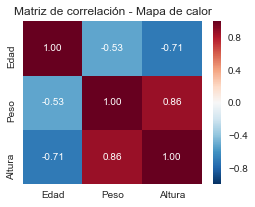

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

f, ax = plt.subplots(1, figsize=(4, 3))
sns.heatmap(mcorr, vmax=1, square=False, annot=True, fmt='.2f')
ax.set_title('Matriz de correlación - Mapa de calor');


De forma análoga, el método `cov` devuelve como resultado un nuevo dataframe que representa la matriz de covarianza.

In [24]:
t5.cov()

,Edad,Peso,Altura
Edad,5.866667,-2.4,-6.6
Peso,-2.400000,3.5,6.2
Altura,-6.600000,6.2,14.8


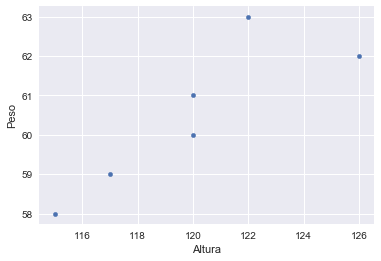

In [25]:
t5.plot(kind='scatter', x='Altura', y='Peso');
plt.xlabel('Altura')
plt.ylabel('Peso');

De la misma forma, es posible calcular la correlación entre un par de columnas (correlación entre dos series).

In [26]:
t5['Edad'].corr(t5['Altura'])

-0.70830021120227626

O la correlación entre las columnas de un dataframe y una serie. Para ello Pandas proporciona la función `corrwith`.

In [27]:
s3 = pd.Series([True, False, True, True, False, True], name = 'Fumador')
s3

0     True
1    False
2     True
3     True
4    False
5     True
Name: Fumador, dtype: bool

In [28]:
t5.corrwith(s3)

Edad      5.330018e-02
Peso     -1.149190e-17
Altura   -3.020202e-01
dtype: float64

## References



* [Python Data Analysis Library](http://pandas.pydata.org/)
* [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)

--------------------

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />